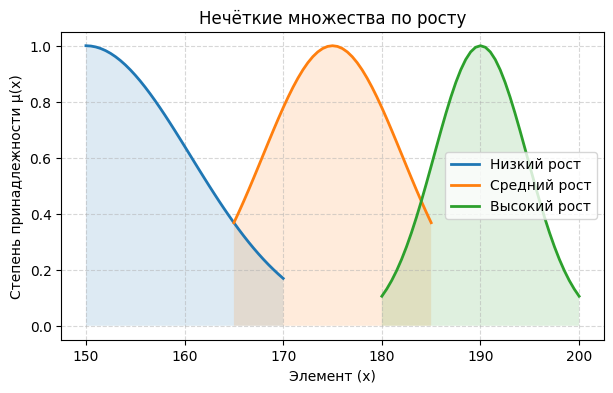

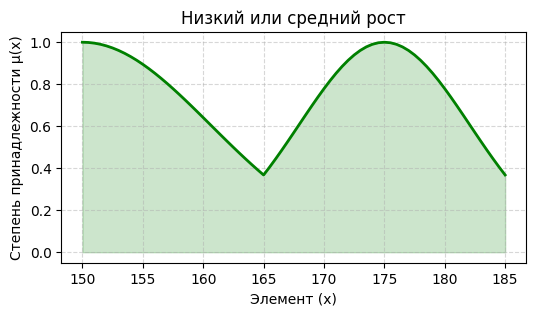

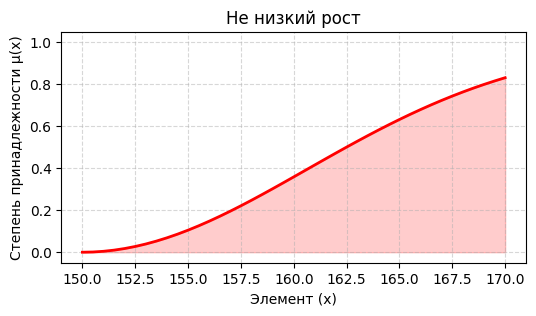

In [31]:
import math
import matplotlib.pyplot as plt

class FuzzySet:
    def __init__(self, data: dict):
        self.values = data.copy()

    def __getitem__(self, x):
        return self.values.get(x, 0)

    def __repr__(self):
        return f"FuzzySet({{{', '.join(f'{x}: {m:.2f}' for x, m in self.values.items())}}})"

    def __invert__(self):
        return FuzzySet({x: 1 - m for x, m in self.values.items()})

    def __or__(self, other: "FuzzySet"):
        result = {}
        all_elements = set(self.values.keys()) | set(other.values.keys())
        for x in all_elements:
            m1 = self.values.get(x, 0)
            m2 = other.values.get(x, 0)
            result[x] = max(m1, m2)
        return FuzzySet(result)

    def __and__(self, other: "FuzzySet"):
        result = {}
        all_elements = set(self.values.keys()) | set(other.values.keys())
        for x in all_elements:
            m1 = self.values.get(x, 0)
            m2 = other.values.get(x, 0)
            result[x] = min(m1, m2)
        return FuzzySet(result)

    def defuzzify(self):
        num = sum(x * m for x, m in self.values.items())
        den = sum(m for m in self.values.values())
        return num / den if den != 0 else None
    
    def plot(self, title="Нечеткое множество", color="blue"):
        xs = sorted(self.values.keys())
        ys = [self.values[x] for x in xs]

        plt.figure(figsize=(6, 3))
        plt.plot(xs, ys, color=color, linewidth=2)
        plt.fill_between(xs, ys, color=color, alpha=0.2)
        plt.title(title)
        plt.xlabel("Элемент (x)")
        plt.ylabel("Степень принадлежности μ(x)")
        plt.ylim(-0.05, 1.05)
        plt.grid(True, linestyle="--", alpha=0.5)
        plt.show()

    @staticmethod
    def plot_many(sets: dict, title="Нечеткие множества"):
        plt.figure(figsize=(7, 4))
        for name, fs in sets.items():
            xs = sorted(fs.values.keys())
            ys = [fs.values[x] for x in xs]
            plt.plot(xs, ys, linewidth=2, label=name)
            plt.fill_between(xs, ys, alpha=0.15)

        plt.title(title)
        plt.xlabel("Элемент (x)")
        plt.ylabel("Степень принадлежности μ(x)")
        plt.ylim(-0.05, 1.05)
        plt.grid(True, linestyle="--", alpha=0.5)
        plt.legend()
        plt.show()

def gaussian_fuzzy_set(a: float, b: float, step: float = 0.1, 
                       sigma: float = math.nan, center: float = math.nan) -> FuzzySet:
    center = center if not math.isnan(center) else (a + b) / 2
    sigma = sigma if not math.isnan(sigma) else (b - a) / 3
    data = {}

    x = a
    while x <= b:
        mu = math.exp(-((x - center) ** 2) / (sigma ** 2))
        data[round(x, 3)] = mu
        x += step

    return FuzzySet(data)


low = gaussian_fuzzy_set(150, 170, step=0.5, center=150, sigma=15)
medium = gaussian_fuzzy_set(165, 185, step=0.5, sigma=10)
high = gaussian_fuzzy_set(180, 200, step=0.5)

FuzzySet.plot_many({
    "Низкий рост": low,
    "Средний рост": medium,
    "Высокий рост": high
}, title="Нечёткие множества по росту")

low_or_medium = low | medium

low_or_medium.plot(title="Низкий или средний рост", color="green")

not_low = ~low

not_low.plot(title="Не низкий рост", color="red")